# Regularización de regresiones lineales

Algunos de los problemas que presentan las regresiones lineales es que se ven perjudicados por la incorporación de variables con mucha correlación y la presencia de datos atípicos u outliers. Esto suele causar *overfitting*. 
(A mayor $\beta$, en valor absoluto, más ajuste, o sobreajuste).<br><br>

Tenemos que empezar a hablar de funciones de pérdida o de coste de los modelos:

*   La función de coste o pérdida mide la bondad de los modelos (diferencia entre nuestra predicción y el valor "correcto")
$$
L(Y, X) = \left( \beta \cdot X -  Y \right)^2
$$

*  Buscamos minimizar esta función para que nuestros modelos sean más precisos:
$$
\min_{\beta} (\beta \cdot X - Y)^2
$$




Veremos algunas variantes de regresión lineal diseñadas para mitigar estos efecto, como *Lasso*, *Ridge* o *Elastic-net*, que incorporan **regularización**.<br><br>




## Ridge regression

La regularización Ridge penaliza los coeficientes más altos introduciendo un parámetro λ:

$$
\min_{\beta} (\beta \cdot X - Y)^2 + \lambda \cdot ||\beta||_2^2
$$

Cuando $\lambda = 0$, la penalización es nula y el resultado es equivalente al de un modelo lineal

En `sklearn` *Ridge regression* se encuentra implementado en `linear_model.Ridge`:

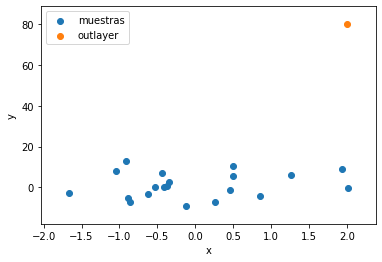

In [7]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# conjunto de datos
n_samples = 20
n_outlayers = 1

X, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

X_outlayers = np.array([[2]])
y_outlayers = np.array([80])

X = np.vstack((X, X_outlayers))
y = np.hstack((y, y_outlayers))

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10, label="muestras")
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10, label="outlayer")

# mostrar el gráfico
plt.legend()
plt.show()

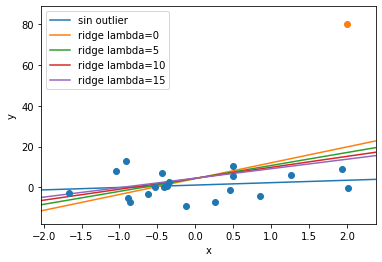

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10)

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, label="sin outlier")

# regresion con outlayers
for alpha in np.arange(0,20,5):
    ridge = Ridge(alpha=alpha).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    plt.plot(line, ridge.intercept_ + ridge.coef_[0] * line, label="ridge lambda=" + str(alpha))

# mostrar el gráfico
plt.legend()
plt.show()

Vemos que a mayor valor de λ, más se penaliza el valor atípico resaltado en naranja. Penalizar los valores de $\beta^2$ se conoce como regularización $\ell2$.

## Lasso regression

Lasso emplea regularización $\ell1$, que se diferencia de la regularización $\ell2$ al sancionar el valor absoluto de los parámetros $\beta$ en lugar de $\beta^2$.

En `sklearn` Lasso se encuentra implementado en `linear_model.Lasso`:

<ipython-input-12-1126e024c33e>:32: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso = Lasso(alpha=alpha).fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


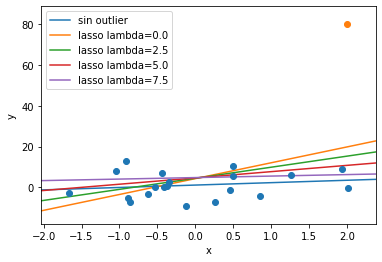

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10)

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, label="sin outlier")

# regresion con outlayers
for alpha in np.arange(0,10,2.5):
    lasso = Lasso(alpha=alpha).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    plt.plot(line, lasso.intercept_ + lasso.coef_[0] * line, label="lasso lambda=" + str(alpha))

# mostrar el gráfico
plt.legend()
plt.show()

Observamos un comportamiento parecido, obtenido de forma similar (pero recordemos la diferencia mencionada anteriormente):
$$
\min_{\beta} \frac{1}{2n_{samples}} ||\beta \cdot X - Y||_2^2 + \lambda \cdot ||\beta||_1
$$

## ¿En qué se diferencian?

La principal diferencia es que **lasso** consigue que algunos coeficientes λ sean exactamente 0, por lo que realiza selección de variables independientes, mientras que ridge no llega a excluir ninguno. <br><br>

Cuando existen variables con mucha correlación, **ridge** reduce la influencia de todos ellos a la vez y de forma proporcional, mientras que lasso tiende a seleccionar uno de ellos, dándole todo el peso y excluyendo al resto


*   **Ventaja de lasso:** excluye predictores variables independientes que no resultan influyentes.
*   **Ventaja de ridge:** reduce los pesos proporcionalmente y **es más estable cuando hay muchas correlaciones altas**
<br>

Para conseguir un equilibrio óptimo entre estas dos propiedades, se puede emplear lo que se conoce como penalización **elastic-net**, que combina ambas estrategias.


## Elastic-Net regression

En este caso, el grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro α:
* Su valor está comprendido en el intervalo [0,1]. 
* Cuando α=0 se aplica ridge
* Cuando α=1 se aplica lasso.

La función de coste asociada a *Elastic-Net* a minimizar es la siguiente:

$$\hat{y}_i = \sum_{f=1}^F \beta_f \cdot x_{i,f}$$

Minimizamos:
$$\min_\beta \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + α \cdot \lambda \sum_{f=1}^F |\beta_f| + \frac{1-α}{2} \lambda \sum_{f=1}^F \beta_f^2$$

Donde $N$ es el número de muestras de nuestro conjunto de datos, $F$ es el número de atributos del mismo, y λ descrito anteriormente para modificar la importancia de la regularización.

En `sklearn` ElasticNet se encuentra implementado en `linear_model.ElasticNet`. Veamos su funcionamiento:

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.683e+03, tolerance: 6.709e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.236e+03, tolerance: 6.709e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

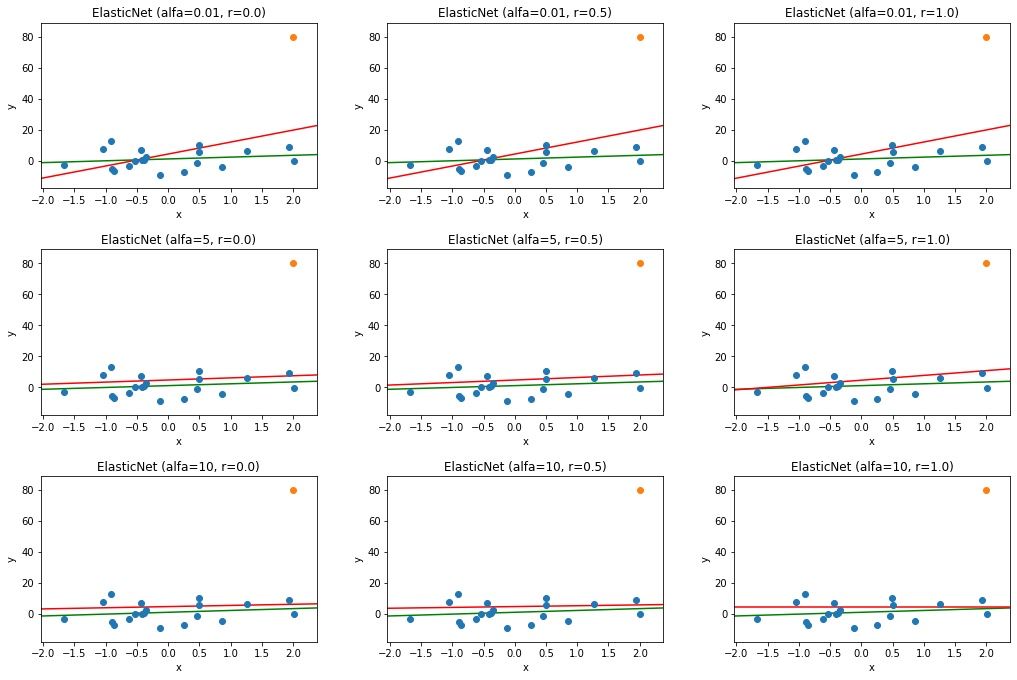

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

def plot_regression(ax, alpha, r):
    
    ax.set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.set_ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

    ax.set_title('ElasticNet (alfa=' + str(alpha) + ', r=' + str(r) + ')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # muestras
    ax.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
    ax.scatter(X[n_samples:,0], y[n_samples:], zorder=10)
    
    # regresion sin outlayers
    reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.plot(line, reg.intercept_ + reg.coef_[0] * line, c="green")

    # elastic net
    elastic = ElasticNet(alpha=alpha, l1_ratio=r).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.plot(line, elastic.intercept_ + elastic.coef_[0] * line, c="red")
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.tight_layout(pad=4.0)

plot_regression(axs[0][0], 0.01, 0.0)
plot_regression(axs[0][1], 0.01, 0.5)
plot_regression(axs[0][2], 0.01, 1.0)

plot_regression(axs[1][0], 5, 0.0)
plot_regression(axs[1][1], 5, 0.5)
plot_regression(axs[1][2], 5, 1.0)

plot_regression(axs[2][0], 10, 0.0)
plot_regression(axs[2][1], 10, 0.5)
plot_regression(axs[2][2], 10, 1.0)

Fuentes: 
* https://www.cienciadedatos.net/documentos/31_seleccion_de_predictores_subset_selection_ridge_lasso_dimension_reduction#Comparaci%C3%B3n_Ridge_y_Lasso
<br>
* https://towardsdatascience.com/everything-you-need-to-know-about-regularization-64734f240622
* https://link.springer.com/article/10.1186/1753-6561-6-S2-S10

Ejemplos obtenidos del material creado por los profesores **Fernando Ortega** (fernando.ortega@upm.es) y **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">